In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

fuel_econ = pd.read_csv('fuel_econ.csv')
fuel_econ.head(6)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


In [8]:
# lets see how the fuel econ looks like
fuel_econ.describe()

# lets check out the properties of the columns we want to see the trend in fuel econs
fuel_econ[['displ', 'comb']].describe()

# min and max for displ == 0.6, 7.0
# min and max for comb == 12.8, 57.78

# if I wanted to create the bins for these display, what would I do?
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


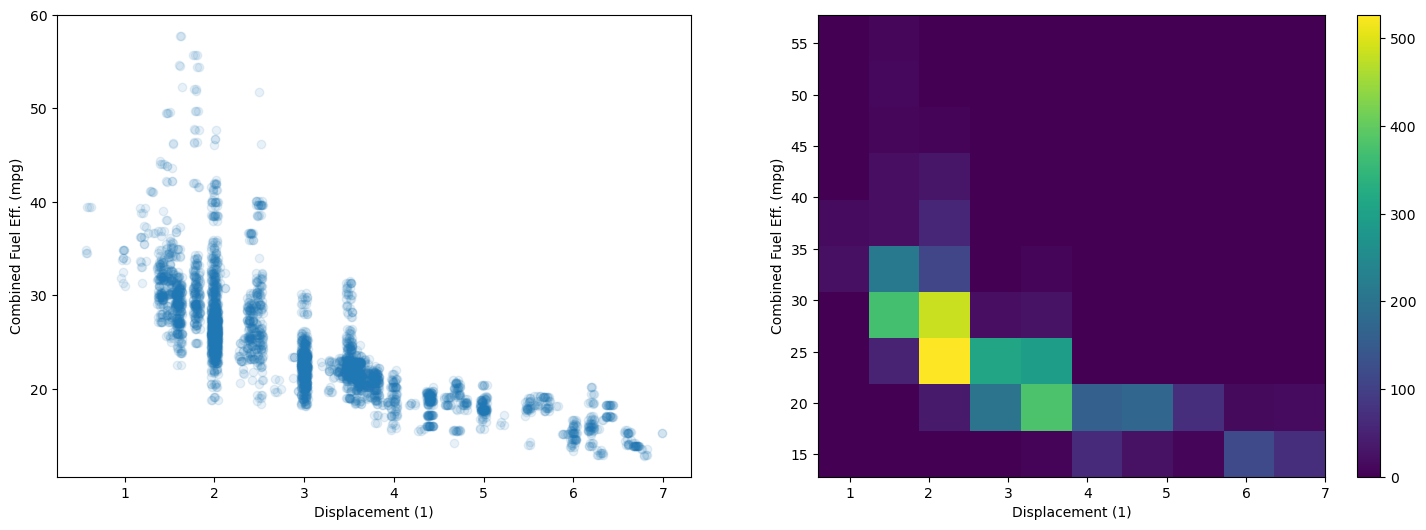

In [25]:
# Lets have two plots, one scatter and the other heatmap
# have two columns to present the plots side by side
plt.figure(figsize = [18, 6])

# left plot
# I have used fit_reg = False, so that I do not plot the regression line
plt.subplot(1, 2, 1)
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', x_jitter = 0.04, fit_reg = False, scatter_kws = {'alpha': 1/10})
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# right plot
plt.subplot(1, 2, 2)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

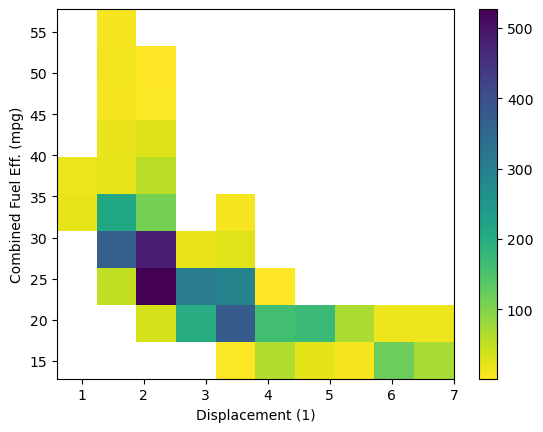

In [26]:
# Heat plot - Set a minimum bound on counts and a reverse color map
# To select a different color palette, you can set the "cmap" parameter in hist2d
# cmap = 'viridis_r': is used for reversing the default "viridis" color palette
# we would also like to color a cell if it contains atleast one point and we will use cmin = 0.5


# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5, cmap = 'viridis_r')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

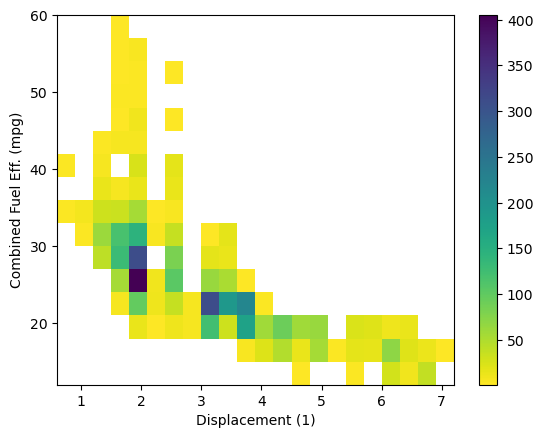

In [27]:
# Heat plot - Specify bin edges
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Notice the areas of high frequency in the middle of the negative trend in the plot.